In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import os
path = os.path.abspath(os.getcwd())
os.chdir("../..")
parent_path = os.path.abspath(os.getcwd())

plt.rcParams['text.usetex'] = True

In [2]:
# MH-PINN

with open(path + '\\hydra_sine_log_dict.pickle', 'rb') as handle:
    hydra_sine = pickle.load(handle)
    
with open(path + '\\hydra_sine_reg_log_dict.pickle', 'rb') as handle:
    hydra_sine_reg = pickle.load(handle)
    
with open(path + '\\hydra_tanh_log_dict.pickle', 'rb') as handle:
    hydra_tanh = pickle.load(handle)
    
with open(path + '\\hydra_tanh_reg_log_dict.pickle', 'rb') as handle:
    hydra_tanh_reg = pickle.load(handle)
    
# PI-DON

with open(path + '\\don_sine_log_dict.pickle', 'rb') as handle:
    don_sine = pickle.load(handle)
    
with open(path + '\\don_sine_reg_log_dict.pickle', 'rb') as handle:
    don_sine_reg = pickle.load(handle)
    
with open(path + '\\don_tanh_log_dict.pickle', 'rb') as handle:
    don_tanh = pickle.load(handle)
    
with open(path + '\\don_tanh_reg_log_dict.pickle', 'rb') as handle:
    don_tanh_reg = pickle.load(handle)

In [3]:
log_ls = [hydra_sine['model_basis'], hydra_sine_reg['model_basis'], hydra_tanh['model_basis'], hydra_tanh_reg['model_basis'], don_sine['model_basis'], don_sine_reg['model_basis'], don_tanh['model_basis'], don_tanh_reg['model_basis']]

In [4]:
def svd(log):
    u, s, vh = np.linalg.svd(log)
    return s

In [5]:
singular_value_ls = []
for i in range(8):
    singular_value_ls.append(svd(log_ls[i]))
singular_value = np.array(singular_value_ls)

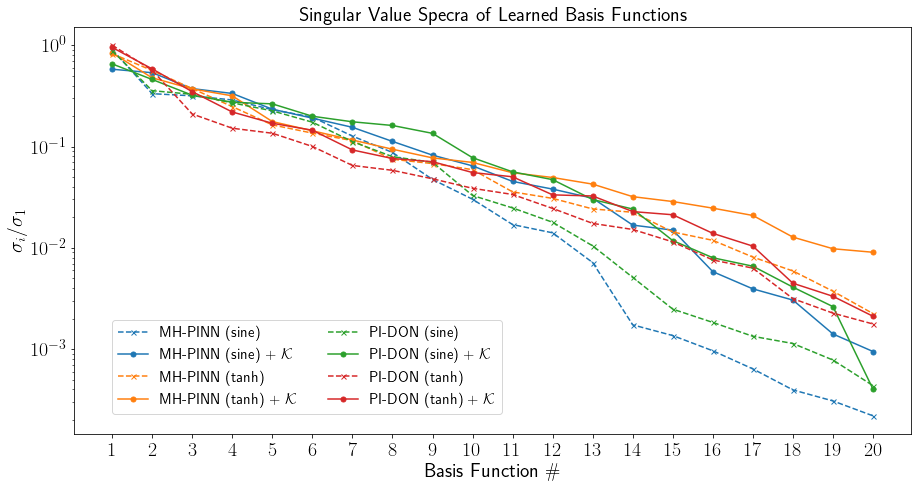

In [6]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
singular_value = singular_value/np.max(singular_value)
ticks = np.linspace(1,20,20)

plt.figure(figsize=(15,7.5))
i = np.linspace(1, 20, 20)
plt.plot(i, singular_value[0,:], c = cycle[0], linestyle='dashed', marker='x', markersize = 5)
plt.plot(i, singular_value[1,:], c = cycle[0], marker='o', markersize = 5)
plt.plot(i, singular_value[2,:], c = cycle[1], linestyle='dashed', marker='x', markersize = 5)
plt.plot(i, singular_value[3,:], c = cycle[1], marker='o', markersize = 5)
plt.plot(i, singular_value[4,:], c = cycle[2], linestyle='dashed', marker='x', markersize = 5)
plt.plot(i, singular_value[5,:], c = cycle[2], marker='o', markersize = 5)
plt.plot(i, singular_value[6,:], c = cycle[3], linestyle='dashed', marker='x', markersize = 5)
plt.plot(i, singular_value[7,:], c = cycle[3], marker='o', markersize = 5)
plt.xlabel('Basis Function $\#$',fontsize=20)
plt.ylabel(r'$\sigma_i / \sigma_1$',fontsize=20)
plt.yscale('log')
plt.title('Singular Value Specra of Learned Basis Functions',fontsize=20)
plt.xticks(ticks=ticks,fontsize=20)
plt.yticks(fontsize=20)
plt.legend([r'MH-PINN (sine)', r'MH-PINN (sine) + $\mathcal{K}$', r'MH-PINN (tanh)', r'MH-PINN (tanh) + $\mathcal{K}$',r'PI-DON (sine)', r'PI-DON (sine) + $\mathcal{K}$', r'PI-DON (tanh)', r'PI-DON (tanh) + $\mathcal{K}$'],ncol=2,fontsize=15, bbox_to_anchor=(0.5, 0., 0.02, 0.3))
plt.savefig(path + 'svdPlot_allencahn.png', dpi = 300, bbox_inches='tight')
plt.show()